In [1]:
import pandas as pd
import pandas_profiling
import missingno as msno

In [2]:
%matplotlib inline

In [3]:
events = pd.read_csv('./data/collisions_events.csv', delimiter=';', index_col='collision_id')

/home/derek/anaconda3/envs/gds/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
events.head()

,collision_date,collision_time,px,street_1,street_type_1,direction_1,street_2,street_type_2,direction_2,street_3,...,location_class,location_desc,collision_type,impact_type,road_class,visibility,light,road_surface_cond,longitude,latitude
collision_id,,,,,,,,,,,,,,,,,,,,,
1,2008-01-01,1,NaN,2219 LAWRENCE,AVEN,W,NaN,NaN,NaN,NaN,...,NaN,NaN,PROPERTY DAMAGE ONLY,SMV OTHER,MINOR ARTERIAL,OTHER,DARK,OTHER,-79.524200,43.697900
2,2008-01-01,1,NaN,24 DELORAINE,AVEN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PROPERTY DAMAGE ONLY,SIDESWIPE,LOCAL,CLEAR,DARK,DRY,-79.406000,43.733700
3,2008-01-01,1,NaN,10 WIDMER,ST,NaN,UNKNOWN,NaN,NaN,NaN,...,NaN,MID-BLOCK,PROPERTY DAMAGE ONLY,SMV UNATTENDED VEHICLE,LANEWAY,RAIN,DARK,WET,-79.391700,43.646700
4,2008-01-01,45,785.0,MARTIN GROVE,ROAD,NaN,BURNHAMTHORPE,ROAD,NaN,NaN,...,NaN,NaN,PROPERTY DAMAGE ONLY,ANGLE,MAJOR ARTERIAL,SNOW,DARK,LOOSE SNOW,-79.549100,43.648600
5,2008-01-01,45,NaN,CARLTON,ST,NaN,CHURCH,ST,NaN,NaN,...,NaN,MID-BLOCK,PROPERTY DAMAGE ONLY,REAR END,MAJOR ARTERIAL,SNOW,DARK,SLUSH,-79.378876,43.661949


In [5]:
events.columns

Index(['collision_date', 'collision_time', 'px', 'street_1', 'street_type_1',
       'direction_1', 'street_2', 'street_type_2', 'direction_2', 'street_3',
       'street_type_3', 'direction_3', 'location_class', 'location_desc',
       'collision_type', 'impact_type', 'road_class', 'visibility', 'light',
       'road_surface_cond', 'longitude', 'latitude'],
      dtype='object')

In [6]:
# Pedestrian and cyclist collisions are a focus of interest 
events.impact_type.value_counts()

REAR END                  157530
TURNING MOVEMENT           94344
SIDESWIPE                  72997
SMV UNATTENDED VEHICLE     46055
ANGLE                      44085
SMV OTHER                  22948
PEDESTRIAN COLLISIONS      17684
CYCLIST COLLISIONS         11862
APPROACHING                10770
OTHER                       8331
Name: impact_type, dtype: int64

In [7]:
involved = pd.read_csv('./data/collisions_involved.csv', delimiter=';', index_col='collision_id')

/home/derek/anaconda3/envs/gds/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/derek/anaconda3/envs/gds/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
involved.head()

,traffic_control,vehicle_class,initial_dir,event1,event2,event3,involved_class,involved_age,involved_injury_class,safety_equip_used,driver_action,pedestrian_action,pedestrian_collision_type,cyclist_action,cyclist_collision_type,manoeuver,actual_speed,posted_speed
collision_id,,,,,,,,,,,,,,,,,,
1,NO CONTROL,OTHER,NaN,BUILDING OR WALL,NaN,NaN,OTHER PROPERTY OWNER,NaN,NONE,OTHER SAFETY EQUIPMENT USED,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN
1,NO CONTROL,"AUTOMOBILE, STATION WAGON",NaN,BUILDING OR WALL,NaN,NaN,DRIVER,31.0,NONE,OTHER SAFETY EQUIPMENT USED,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN
2,NO CONTROL,"AUTOMOBILE, STATION WAGON",NaN,OTHER,NaN,NaN,DRIVER,NaN,NONE,USE UNKNOWN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN
2,NO CONTROL,OTHER,EAST,OTHER,NaN,NaN,OTHER,51.0,NONE,OTHER SAFETY EQUIPMENT USED,NaN,NaN,NaN,NaN,NaN,PARKED,NaN,NaN
3,NO CONTROL,"AUTOMOBILE, STATION WAGON",EAST,OTHER,NaN,NaN,DRIVER,NaN,NONE,OTHER SAFETY EQUIPMENT USED,IMPROPER PASSING,NaN,NaN,NaN,NaN,GOING AHEAD,NaN,NaN


In [9]:
involved.columns

Index(['traffic_control', 'vehicle_class', 'initial_dir', 'event1', 'event2',
       'event3', 'involved_class', 'involved_age', 'involved_injury_class',
       'safety_equip_used', 'driver_action', 'pedestrian_action',
       'pedestrian_collision_type', 'cyclist_action', 'cyclist_collision_type',
       'manoeuver', 'actual_speed', 'posted_speed'],
      dtype='object')

In [10]:
# Should subset to major and fatal collisions
involved.involved_injury_class.value_counts()

NONE       987864
MINIMAL     84799
MINOR       60049
MAJOR        3761
FATAL         543
Name: involved_injury_class, dtype: int64

In [11]:
ksi = involved[(involved.involved_injury_class == 'FATAL') | (involved.involved_injury_class == 'MAJOR')]

In [12]:
ksi.index.unique()

Int64Index([   458,    589,    722,    731,    913,    918,    926,    955,
              1324,   1337,
            ...
            484339, 484347, 484475, 484583, 484683, 484792, 485919, 485956,
            486160, 486448],
           dtype='int64', name='collision_id', length=3993)

In [13]:
ksi = ksi.merge(events, left_index=True, right_index=True)

In [14]:
ped_cyc_ksi = ksi[(ksi.impact_type == 'PEDESTRIAN COLLISIONS') | (ksi.impact_type == 'CYCLIST COLLISIONS')]

In [15]:
ped_cyc_ksi.street_1.value_counts()

EGLINTON           80
DUNDAS             74
FINCH              71
QUEEN              66
YONGE              59
LAWRENCE           56
STEELES            51
BATHURST           51
DANFORTH           47
BLOOR              46
SHEPPARD           45
ST CLAIR           40
VICTORIA PARK      33
JANE               33
DUFFERIN           32
SPADINA            29
LAKE SHORE         28
COLLEGE            26
KING               26
KINGSTON           25
KENNEDY            22
GERRARD            20
AVENUE             20
MARKHAM            20
KIPLING            20
WARDEN             18
DON MILLS          18
MIDLAND            16
WESTON             16
BAYVIEW            16
                   ..
YORK MILLS RD       1
SIMCOE ST           1
SPADINA AVE         1
HILDA               1
WELLESLEY ST W      1
196 DUPONT ST       1
MALVERN             1
CIVIC               1
REDCLIFF            1
437 DANFORTH        1
MARLEE              1
2609 EGLINTON       1
RIVALDA             1
GERRARD ST E        1
HUMBERSIDE

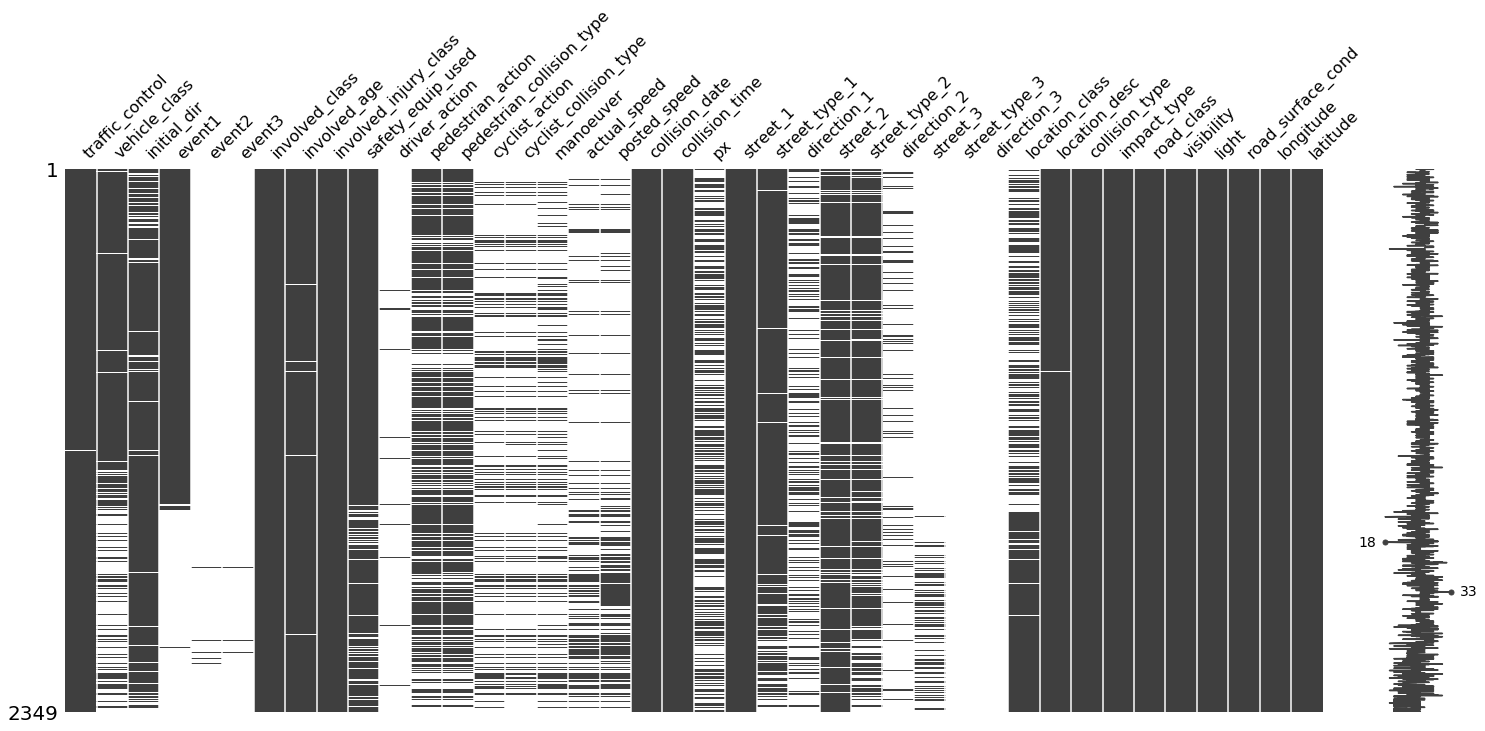

In [16]:
msno.matrix(ped_cyc_ksi)

In [62]:
ped_cyc_ksi = ped_cyc_ksi.reset_index()

In [69]:
ksi_indices = ped_cyc_ksi.collision_id.unique()

In [17]:
# collisions where a driver was speeding
ped_cyc_ksi[ped_cyc_ksi.actual_speed > ped_cyc_ksi.posted_speed]

,traffic_control,vehicle_class,initial_dir,event1,event2,event3,involved_class,involved_age,involved_injury_class,safety_equip_used,...,location_class,location_desc,collision_type,impact_type,road_class,visibility,light,road_surface_cond,longitude,latitude
collision_id,,,,,,,,,,,,,,,,,,,,,
20439,NO CONTROL,"AUTOMOBILE, STATION WAGON",NORTH,OTHER,NaN,NaN,DRIVER,52.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,COLLECTOR,RAIN,DAYLIGHT,WET,-79.234700,43.741500
22366,NO CONTROL,OTHER,EAST,OTHER,NaN,NaN,PEDESTRIAN,26.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,MINOR ARTERIAL,RAIN,DARK,WET,-79.332600,43.807700
22366,NO CONTROL,OTHER,EAST,OTHER,NaN,NaN,PEDESTRIAN,28.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,MINOR ARTERIAL,RAIN,DARK,WET,-79.332600,43.807700
23784,TRAFFIC SIGNAL,OTHER,NORTH,OTHER,NaN,NaN,PEDESTRIAN,75.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,AT INTERSECTION,INTERSECTION,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DARK,DRY,-79.518600,43.718700
26110,TRAFFIC SIGNAL,OTHER,NORTH,OTHER,NaN,NaN,PEDESTRIAN,50.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,AT INTERSECTION,INTERSECTION,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DAYLIGHT,DRY,-79.323800,43.683300
33270,NO CONTROL,BICYCLE,WEST,OTHER,NaN,NaN,CYCLIST,50.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,AT INTERSECTION,INTERSECTION,FATAL,CYCLIST COLLISIONS,MINOR ARTERIAL,CLEAR,DAYLIGHT,DRY,-79.499200,43.697300
151882,NO CONTROL,OTHER,WEST,OTHER,NaN,NaN,PEDESTRIAN,79.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DARK,WET,-79.426900,43.706600
203774,NO CONTROL,MOTORCYCLE,SOUTH,OTHER,NaN,NaN,MOTORCYCLE DRIVER,48.0,MAJOR,HELMET,...,NaN,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MINOR ARTERIAL,CLEAR,DAYLIGHT,DRY,-79.367800,43.663200
234260,NO CONTROL,OTHER,UNKNOWN,OTHER,NaN,NaN,PEDESTRIAN,34.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,RAIN,DARK,WET,-79.453500,43.714100


In [20]:
import geopandas as gpd

In [21]:
gdf = gpd.read_file('./data/city_ward_wgs84/citygcs.ward_2018_wgs84.shp')

In [22]:
#gdf.plot()

In [23]:
# https://residentmario.github.io/geoplot/examples/nyc-collision-factors.html
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt

In [24]:
from shapely.geometry import Point

In [25]:
# need to conver lat/long from the ped_cyc_ksi df to Points in order to merge over map data
geoms = [Point(xy) for xy in zip(ped_cyc_ksi.longitude, ped_cyc_ksi.latitude)]
ksi_df = ped_cyc_ksi.drop(['longitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
ksi_gdf = gpd.GeoDataFrame(ksi_df, crs=crs, geometry=geoms)

In [26]:
ksi_gdf.head()

,traffic_control,vehicle_class,initial_dir,event1,event2,event3,involved_class,involved_age,involved_injury_class,safety_equip_used,...,direction_3,location_class,location_desc,collision_type,impact_type,road_class,visibility,light,road_surface_cond,geometry
collision_id,,,,,,,,,,,,,,,,,,,,,
722,NO CONTROL,OTHER,NORTH,OTHER,NaN,NaN,PEDESTRIAN,31.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,INTERSECTION,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,RAIN,DARK,WET,POINT (-79.2439 43.7376)
731,NO CONTROL,OTHER,WEST,OTHER,NaN,NaN,PEDESTRIAN,75.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,LOCAL,CLEAR,DARK,WET,POINT (-79.5652 43.6843)
913,TRAFFIC SIGNAL,OTHER,WEST,OTHER,NaN,NaN,PEDESTRIAN,74.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,AT INTERSECTION,INTERSECTION,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DARK,WET,POINT (-79.4208 43.7375)
918,STOP SIGN,OTHER,SOUTH,OTHER,NaN,NaN,PEDESTRIAN,12.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,AT INTERSECTION,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,LOCAL,CLEAR,DARK,WET,POINT (-79.2907 43.7949)
926,TRAFFIC SIGNAL,OTHER,EAST,OTHER,NaN,NaN,PEDESTRIAN,10.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,COLLECTOR,RAIN,DARK,WET,POINT (-79.33159999999999 43.7183)


In [27]:
ksi_gdf[ksi_gdf.pedestrian_collision_type == 'PEDESTRIAN HIT ON SIDEWALK OR SHOULDER']

,traffic_control,vehicle_class,initial_dir,event1,event2,event3,involved_class,involved_age,involved_injury_class,safety_equip_used,...,direction_3,location_class,location_desc,collision_type,impact_type,road_class,visibility,light,road_surface_cond,geometry
collision_id,,,,,,,,,,,,,,,,,,,,,
1730,NO CONTROL,OTHER,EAST,OTHER,NaN,NaN,PEDESTRIAN,42.0,MAJOR,NO EQUIPMENT AVAILABLE,...,NaN,NaN,MID-BLOCK,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,SNOW,DAYLIGHT,LOOSE SNOW,POINT (-79.54989999999999 43.7505)
3369,NO CONTROL,NaN,WEST,OTHER,NaN,NaN,PEDESTRIAN,78.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,MID-BLOCK,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DAYLIGHT,DRY,POINT (-79.39019775390629 43.66949844360349)
7041,NO CONTROL,OTHER,NaN,OTHER,NaN,NaN,PEDESTRIAN,29.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,MID-BLOCK,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DARK,DRY,POINT (-79.44710000000001 43.6369)
7041,NO CONTROL,OTHER,NaN,OTHER,NaN,NaN,PEDESTRIAN,40.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,MID-BLOCK,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DARK,DRY,POINT (-79.44710000000001 43.6369)
9550,NO CONTROL,OTHER,NaN,OTHER,NaN,NaN,PEDESTRIAN,20.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,MID-BLOCK,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DAYLIGHT,DRY,POINT (-79.26139999999999 43.7523)
13469,TRAFFIC SIGNAL,OTHER,NaN,"POLE (UTILITY, TOWER)",NaN,NaN,PEDESTRIAN,47.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DARK,DRY,POINT (-79.378 43.643)
14059,TRAFFIC SIGNAL,OTHER,NORTH,OTHER,NaN,NaN,PEDESTRIAN,53.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,AT INTERSECTION,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DAYLIGHT,DRY,POINT (-79.37690000000001 43.6624)
14758,STOP SIGN,OTHER,SOUTH,OTHER,NaN,NaN,PEDESTRIAN,36.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,AT INTERSECTION,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MINOR ARTERIAL,CLEAR,DAYLIGHT,DRY,POINT (-79.3426 43.6729)
16536,NO CONTROL,OTHER,NaN,OTHER,NaN,NaN,PEDESTRIAN,87.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,AT INTERSECTION,INTERSECTION,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DAYLIGHT,DRY,POINT (-79.6037 43.7191)


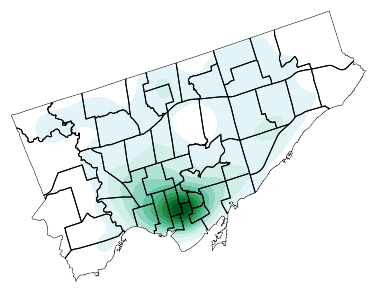

In [28]:
# heatmap of KSI
fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(111, projection=gcrs.AlbersEqualArea(central_latitude=43.6570304, central_longitude=-79.6017281))
gplt.kdeplot(ksi_gdf,
             projection=gcrs.AlbersEqualArea(),
             shade=True,
             clip=gdf.geometry,
             shade_lowest=False,
             ax=ax1)

gplt.polyplot(gdf, projection=gcrs.AlbersEqualArea(), ax=ax1)

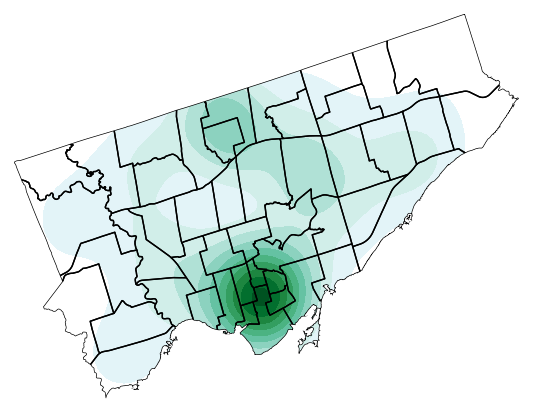

In [42]:
# susbet of ksi
fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(111, projection=gcrs.AlbersEqualArea(central_latitude=43.6570304, central_longitude=-79.6017281))
gplt.kdeplot(ksi_gdf[ksi_gdf.pedestrian_collision_type == 'PEDESTRIAN HIT ON SIDEWALK OR SHOULDER'],
             projection=gcrs.AlbersEqualArea(),
             shade=True,
             clip=gdf.geometry,
             shade_lowest=False,
             ax=ax1)

gplt.polyplot(gdf, projection=gcrs.AlbersEqualArea(), ax=ax1)


In [39]:
ksi_gdf.head()

,traffic_control,vehicle_class,initial_dir,event1,event2,event3,involved_class,involved_age,involved_injury_class,safety_equip_used,...,direction_3,location_class,location_desc,collision_type,impact_type,road_class,visibility,light,road_surface_cond,geometry
collision_id,,,,,,,,,,,,,,,,,,,,,
722,NO CONTROL,OTHER,NORTH,OTHER,NaN,NaN,PEDESTRIAN,31.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,INTERSECTION,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,RAIN,DARK,WET,POINT (-79.2439 43.7376)
731,NO CONTROL,OTHER,WEST,OTHER,NaN,NaN,PEDESTRIAN,75.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,LOCAL,CLEAR,DARK,WET,POINT (-79.5652 43.6843)
913,TRAFFIC SIGNAL,OTHER,WEST,OTHER,NaN,NaN,PEDESTRIAN,74.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,AT INTERSECTION,INTERSECTION,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DARK,WET,POINT (-79.4208 43.7375)
918,STOP SIGN,OTHER,SOUTH,OTHER,NaN,NaN,PEDESTRIAN,12.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,AT INTERSECTION,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,LOCAL,CLEAR,DARK,WET,POINT (-79.2907 43.7949)
926,TRAFFIC SIGNAL,OTHER,EAST,OTHER,NaN,NaN,PEDESTRIAN,10.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,NaN,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,COLLECTOR,RAIN,DARK,WET,POINT (-79.33159999999999 43.7183)


In [30]:
dooring = pd.read_csv('./data/dooring_14_17.csv')

In [32]:
dooring.shape

(704, 5)

In [33]:
dooring.head()

,long,lat,incident_date,incident_time,location
0,-79.381563,43.655911,06/17/2016,1200.0,1 DUNDAS ST W
1,-79.394831,43.662464,10/08/2014,2209.0,10 KINGS COLLEGE CRCL
2,-79.381472,43.645959,06/07/2016,1400.0,100 FRONT ST W
3,-79.381714,43.648778,10/06/2016,1657.0,100 KING ST W
4,-79.383625,43.652822,06/23/2015,1745.0,100 QUEEN ST W


In [36]:
geoms = [Point(xy) for xy in zip(dooring.long, dooring.lat)]
dooring_df = dooring.drop(['long', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
dooring_gdf = gpd.GeoDataFrame(dooring_df, crs=crs, geometry=geoms)

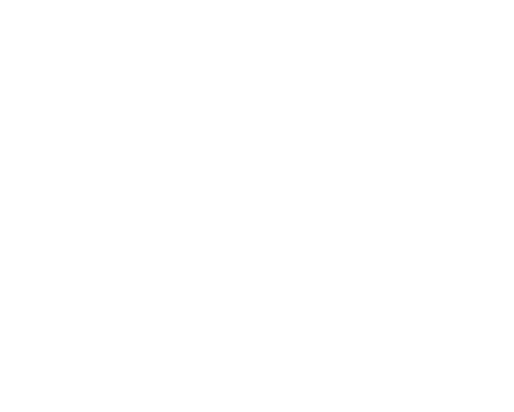

In [48]:
# heatmap of dooring events
fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(111, projection=gcrs.AlbersEqualArea(central_latitude=43.6570304, central_longitude=-79.6017281))
gplt.kdeplot(dooring_gdf,
             projection=gcrs.AlbersEqualArea(),
             shade=True,
             clip=gdf.geometry,
             shade_lowest=False,
             ax=ax1)

gplt.polyplot(gdf, projection=gcrs.AlbersEqualArea(), ax=ax1)

In [44]:
dooring_gdf.head()

,incident_date,incident_time,location,geometry
0,06/17/2016,1200.0,1 DUNDAS ST W,POINT (-79.3815627 43.65591125)
1,10/08/2014,2209.0,10 KINGS COLLEGE CRCL,POINT (-79.39483100000001 43.662464)
2,06/07/2016,1400.0,100 FRONT ST W,POINT (-79.38147234 43.64595898)
3,10/06/2016,1657.0,100 KING ST W,POINT (-79.381714 43.6487781)
4,06/23/2015,1745.0,100 QUEEN ST W,POINT (-79.38362506 43.65282214)
